# <hl> Week 1 Assignment Overview

In this assignment, I will be analyzing location data from the Green Book, a Jim-crow era Black travel guide created by former postal worker Victor H. Green that ran from 1936 - 1966. The Schomburg Center for Research in Black Culture at the New York Public Library digitized 21 guides in 2015 and released the open source data. My data dive was inspired by Ethan Bottone's critical GIS analysis of New Orleans in "'Please Mention the Green Book:' The *Negro Motorist* Green Book as Critical GIS." Using the *Green Book* as a critical mapping tool, we can learn more about both the spatial geography of Jim Crow America and the landscapes of safety therein. While vehicles themselves had a "twin symbolism of mobility and freedom," (Piercy 2) this era of black mobility and the Great Migration offer a glimpse into what Harriet Jacobs calls a "loophole of retreat," a strategic site where one can safely surveil and be shielded from the world's dangers while offering power to shift one's fate. Through analyzing *Green Book* location data from 1947 and 1956,  before and after the outlaw of racially restrictive covenants, in Los Angeles, I seek to reveal a local landscape of safety and interrogate how shifts in discriminationatory policies governing private and public space may have impacted this ecology. In subsequent analyses, I'd like to compare this with 1940 and 1960 Census data on race and median household income at the tract level to better understand shifts in these landscapes of safety amidst complex urban neighborhood changes. While this nascent investigation is limited in its ability to account for the influence of Black interior spatial practice, lessons from this study are aimed to have future implications for safety and care infrastructure today.

In [1]:
import geopandas as gpd

In [2]:
filename = "1947.geojson"
file = open(filename)
df = gpd.read_file(file)

# Data type:

In [3]:
type(df)

geopandas.geodataframe.GeoDataFrame

# Quick Glimpse of this Cool Data:

In [4]:

df.head()

,name,address,image_url,image_id,capture_uuid,dc_url,page,year,city,state,category,image_region,geocoded_address,geocoded_confidence,geometry
0,"around 20,",000 miles per year,http://images.nypl.org/index.php?id=5207629&t=q,5207629,2a4111a0-892b-0132-5d0d-58d385a7bbd0,http://digitalcollections.nypl.org/items/2a411...,12,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.10086027884900624, 'y': 0.521487419283...","000 Miles Rd, Mulberry, Tennessee 37359, Unite...",0.509286,POINT (-86.39971 35.19817)
1,St. Thomas,127 W. 10th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.12726176115802174, 'y': 0.166629736317...","127 W 10th St, Chattanooga, Tennessee 37402, U...",0.852143,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,69 Cotton St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,ANDALUSIA,TENNESSEE,Tourist Home,"{'x': 0.12907117008443908, 'y': 0.222690006647...","69 S Cotton St, Andalusia, Alabama 36420, Unit...",0.728333,POINT (-86.48221 31.30161)
3,Dunbar,323 N. 17th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11459589867310013, 'y': 0.266341679592...","323 N 17th St, Knoxville, Tennessee 37921, Uni...",0.852143,POINT (-83.93629 35.96380)
4,Palm Leaf,328 1/2 18th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11670687575392039, 'y': 0.289829381785...","328 18th St, Knoxville, Tennessee 37916, Unite...",0.828333,POINT (-83.93586 35.95957)


# Looks like we have data from across the country. Now, let's take a look at a random sample.

In [5]:
df.sample(10)

,name,address,image_url,image_id,capture_uuid,dc_url,page,year,city,state,category,image_region,geocoded_address,geocoded_confidence,geometry
434,Keys,7th & T St N. W.,http://images.nypl.org/index.php?id=5207652&t=q,5207652,2c43dbd0-892b-0132-7a83-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c43d...,35,1947,DISTRICT OF COLUMBIA,DELAWARE,Restaurant,"{'x': 0.09074243813015583, 'y': 0.415688012408...","T St NW, Washington, District of Columbia 2000...",0.795000,POINT (-77.03129 38.91574)
745,Grant Flatt,1239 Reynolds,http://images.nypl.org/index.php?id=5207661&t=q,5207661,2d330920-892b-0132-81c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2d330...,44,1947,SCOTLAND,LOUISIANA,Tourist Home,"{'x': 0.10378510378510378, 'y': 0.475293596277...","1239 Reynolds St, Springhill, Louisiana 71075,...",0.715000,POINT (-93.44179 32.99986)
629,Smith’s,446 Douglas St.,http://images.nypl.org/index.php?id=5207656&t=q,5207656,2c9514c0-892b-0132-438a-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c951...,39,1947,INDIANAPOLIS,INDIANA,Beauty Parlor,"{'x': 0.13058207576224207, 'y': 0.280301351650...","446 Douglas St, Wolcottville, Indiana 46795, U...",0.828333,POINT (-85.36912 41.52049)
1032,West Side,1136 Springwood Ave.,http://images.nypl.org/index.php?id=5207668&t=q,5207668,2de207d0-892b-0132-1bc9-58d385a7bbd0,http://digitalcollections.nypl.org/items/2de20...,51,1947,I,NEW JERSEY,Hotel,"{'x': 0.5531135531135531, 'y': 0.7939286505650...","1136 Springwood Ave, Asbury Park, New Jersey 0...",0.852143,POINT (-74.01986 40.21475)
126,Williams,121 E. 9th St.,http://images.nypl.org/index.php?id=5207647&t=q,5207647,2bc89e70-892b-0132-2a3c-58d385a7bbd0,http://digitalcollections.nypl.org/items/2bc89...,30,1947,TO RIST HOMES,ARKANSAS,Barber Shop,"{'x': 0.1212303980699638, 'y': 0.5023266120097...","121 E 9th St, Texarkana, Arkansas 71854, Unite...",0.661667,POINT (-94.04243 33.43109)
341,Archie's,2449 LarmIer St.,http://images.nypl.org/index.php?id=5207650&t=q,5207650,2c170280-892b-0132-f209-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c170...,33,1947,COLORADO SPRINGS V,COLORADO,=‘-.tavern,"{'x': 0.17497733454215778, 'y': 0.920895191668...","Colorado Springs, Colorado, United States",0.798000,POINT (-104.82530 38.83400)
483,Ben-Flo,720 E. Leon St.,http://images.nypl.org/index.php?id=5207652&t=q,5207652,2c43dbd0-892b-0132-7a83-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c43d...,35,1947,LAKE CITY,FLORIDA,Tourist Home,"{'x': 0.5413993278337916, 'y': 0.7365388876578...","720 E Leon St, Lake City, Florida 32055, Unite...",0.996000,POINT (-82.63220 30.19412)
959,Anderson’s,930 N. Comptdn,http://images.nypl.org/index.php?id=5207667&t=q,5207667,2dc90bd0-892b-0132-b7ad-58d385a7bbd0,http://digitalcollections.nypl.org/items/2dc90...,50,1947,ST. JOSEPH,MISSISSIPPI,Service Station,"{'x': 0.528998778998779, 'y': 0.65322401949922...","930 North Rd, Ecru, Mississippi 38841, United ...",0.509286,POINT (-89.00582 34.36514)
519,Hawk’s,306 Auburn,http://images.nypl.org/index.php?id=5207653&t=q,5207653,2c58b300-892b-0132-23e3-58d385a7bbd0,http://digitalcollections.nypl.org/items/2c58b...,36,1947,ALBANY,GEORGIA,Restaurant,"{'x': 0.5521978021978022, 'y': 0.3071127852869...","306 Auburn Rd, Auburn, Georgia 30011, United S...",0.715000,POINT (-83.87371 34.01960)
2,Mrs. Ed. Andrews,69 Cotton St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,ANDALUSIA,TENNESSEE,Tourist Home,"{'x': 0.12907117008443908, 'y': 0.222690006647...","69 S Cotton St, Andalusia, Alabama 36420, Unit...",0.728333,POINT (-86.48221 31.30161)


# How many entries are in the 1947 Green Book?

In [7]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 1056 non-null   object  
 1   address              1056 non-null   object  
 2   image_url            1056 non-null   object  
 3   image_id             1056 non-null   object  
 4   capture_uuid         1056 non-null   object  
 5   dc_url               1056 non-null   object  
 6   page                 1056 non-null   int64   
 7   year                 1056 non-null   int64   
 8   city                 1056 non-null   object  
 9   state                1056 non-null   object  
 10  category             1056 non-null   object  
 11  image_region         1056 non-null   object  
 12  geocoded_address     1056 non-null   object  
 13  geocoded_confidence  1056 non-null   float64 
 14  geometry             1056 non-null   geometry
dtypes: float64(1)

# Verify the number of records and variables (columns) another way:

In [8]:
df.shape

(1056, 15)

# Random Sampling of Cities included in the 1947 Green Book:

In [9]:
df['city'].sample(5)

1010                 OMAHA
328     COLORADO SPRINGS V
815          BENTON HARBOR
816                 BITELY
74             LITTLE ROCK
Name: city, dtype: object

In [10]:
df.city

0       WESTCHESTER
1       WESTCHESTER
2         ANDALUSIA
3        BIRMINGHAM
4        BIRMINGHAM
           ...     
1051       CAPE MAY
1052       CAPE MAY
1053       CAPE MAY
1054       CAPE MAY
1055       CAPE MAY
Name: city, Length: 1056, dtype: object

# How many different locations per city are represented in the 1947 Green Book?

In [12]:
df['city'].value_counts()

LOS ANGELES             101
ST. JOSEPH               57
COLORADO SPRINGS V       51
DISTRICT OF COLUMBIA     47
LITTLE ROCK              47
                       ... 
ORLANDO                   1
ST AUGUSTINE              1
MORGAN CITY               1
MONROE                    1
GARY                      1
Name: city, Length: 167, dtype: int64

# Save this as a variable:

In [13]:
df_count = df['city'].value_counts()

# Add Dataframe

In [15]:
df_count - df_count.reset_index()
df_count

LOS ANGELES             101
ST. JOSEPH               57
COLORADO SPRINGS V       51
DISTRICT OF COLUMBIA     47
LITTLE ROCK              47
                       ... 
ORLANDO                   1
ST AUGUSTINE              1
MORGAN CITY               1
MONROE                    1
GARY                      1
Name: city, Length: 167, dtype: int64

In [17]:
type(df_count)

pandas.core.series.Series

# Repeat these steps for category of location:

In [18]:
df.category

0       Tourist Home
1       Tourist Home
2       Tourist Home
3       Tourist Home
4       Tourist Home
            ...     
1051          Garage
1052          Garage
1053          Garage
1054          Garage
1055          Garage
Name: category, Length: 1056, dtype: object

# How many records of each different category?

In [19]:
df['category'].value_counts()

Tourist Home                241
Hotel                       197
Restaurant                  163
Beauty Parlor                89
Tavern                       84
Barber Shop                  49
Service Station              49
Drug Store                   39
Night Club                   38
Liquor Shop                  30
Garage                       26
Tailor                       26
Sanitarium                    5
Hot Spring                    4
Beauty School                 3
Road House                    3
=‘-.tavern                    3
Taxi                          3
Beauty Shop                   2
School Of Beauty Eulture      1
School Of Beauty Culture      1
Name: category, dtype: int64

# New Variable:

In [21]:
#looks like majority of the locations were tourist homes and hotels, private and public space respectively...let's save this one as a variable
category_count = df['category'].value_counts()
category_count

Tourist Home                241
Hotel                       197
Restaurant                  163
Beauty Parlor                89
Tavern                       84
Barber Shop                  49
Service Station              49
Drug Store                   39
Night Club                   38
Liquor Shop                  30
Garage                       26
Tailor                       26
Sanitarium                    5
Hot Spring                    4
Beauty School                 3
Road House                    3
=‘-.tavern                    3
Taxi                          3
Beauty Shop                   2
School Of Beauty Eulture      1
School Of Beauty Culture      1
Name: category, dtype: int64

# Convert to data frame:

In [23]:
category_count = category_count.reset_index()
category_count

,level_0,index,category
0,0,Tourist Home,241
1,1,Hotel,197
2,2,Restaurant,163
3,3,Beauty Parlor,89
4,4,Tavern,84
5,5,Barber Shop,49
6,6,Service Station,49
7,7,Drug Store,39
8,8,Night Club,38
9,9,Liquor Shop,30


In [24]:
type(category_count)

pandas.core.frame.DataFrame

# Before we rename our columns, let's understand what the current columns are.

In [25]:
category_count.columns.to_list()

['level_0', 'index', 'category']

In [26]:
category_count.columns = ['order', 'location type', 'count']

In [27]:
category_count

,order,location type,count
0,0,Tourist Home,241
1,1,Hotel,197
2,2,Restaurant,163
3,3,Beauty Parlor,89
4,4,Tavern,84
5,5,Barber Shop,49
6,6,Service Station,49
7,7,Drug Store,39
8,8,Night Club,38
9,9,Liquor Shop,30


# Quick plot of how many per location type:

<AxesSubplot:>

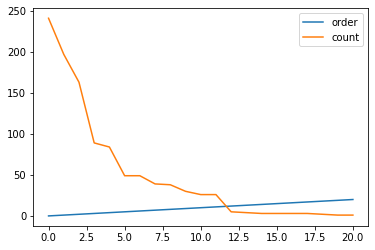

In [28]:
category_count.plot()

# Clean up plot:

<AxesSubplot:title={'center':'Types of Locations in the Green Book 1947'}, xlabel='location type'>

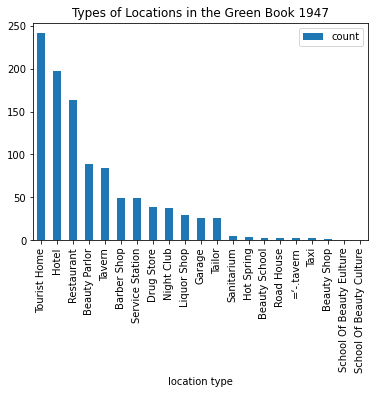

In [29]:
category_count.plot.bar(x = 'location type', y = 'count', title = 'Types of Locations in the Green Book 1947')

# Recheck number of records:

In [30]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 1056 non-null   object  
 1   address              1056 non-null   object  
 2   image_url            1056 non-null   object  
 3   image_id             1056 non-null   object  
 4   capture_uuid         1056 non-null   object  
 5   dc_url               1056 non-null   object  
 6   page                 1056 non-null   int64   
 7   year                 1056 non-null   int64   
 8   city                 1056 non-null   object  
 9   state                1056 non-null   object  
 10  category             1056 non-null   object  
 11  image_region         1056 non-null   object  
 12  geocoded_address     1056 non-null   object  
 13  geocoded_confidence  1056 non-null   float64 
 14  geometry             1056 non-null   geometry
dtypes: float64(1)

# Trim data to only show name, city, state, category, and geometry:

In [45]:
df[['name', 'city', 'state', 'category', 'geometry']]

,name,city,state,category,geometry
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817)
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161)
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380)
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957)
...,...,...,...,...,...
1051,Groom's,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1052,F. T. Jones,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1053,McGuire's Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1054,Way Side Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.88674 39.00496)


# Make short list its own variable:

In [151]:
desired_columns = ['name', 'city', 'state', 'category', 'geometry']

df[desired_columns]

,name,city,state,category,geometry
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817)
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161)
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380)
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957)
...,...,...,...,...,...
1051,Groom's,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1052,F. T. Jones,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1053,McGuire's Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1054,Way Side Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.88674 39.00496)


# Make a New Variable with Trimmed Data

In [47]:
df.head()

,name,address,image_url,image_id,capture_uuid,dc_url,page,year,city,state,category,image_region,geocoded_address,geocoded_confidence,geometry
0,"around 20,",000 miles per year,http://images.nypl.org/index.php?id=5207629&t=q,5207629,2a4111a0-892b-0132-5d0d-58d385a7bbd0,http://digitalcollections.nypl.org/items/2a411...,12,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.10086027884900624, 'y': 0.521487419283...","000 Miles Rd, Mulberry, Tennessee 37359, Unite...",0.509286,POINT (-86.39971 35.19817)
1,St. Thomas,127 W. 10th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.12726176115802174, 'y': 0.166629736317...","127 W 10th St, Chattanooga, Tennessee 37402, U...",0.852143,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,69 Cotton St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,ANDALUSIA,TENNESSEE,Tourist Home,"{'x': 0.12907117008443908, 'y': 0.222690006647...","69 S Cotton St, Andalusia, Alabama 36420, Unit...",0.728333,POINT (-86.48221 31.30161)
3,Dunbar,323 N. 17th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11459589867310013, 'y': 0.266341679592...","323 N 17th St, Knoxville, Tennessee 37921, Uni...",0.852143,POINT (-83.93629 35.96380)
4,Palm Leaf,328 1/2 18th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11670687575392039, 'y': 0.289829381785...","328 18th St, Knoxville, Tennessee 37916, Unite...",0.828333,POINT (-83.93586 35.95957)


In [48]:
df_trimmed = df[desired_columns].copy()
df_trimmed

,name,city,state,category,geometry
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817)
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161)
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380)
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957)
...,...,...,...,...,...
1051,Groom's,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1052,F. T. Jones,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1053,McGuire's Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.90600 38.93510)
1054,Way Side Inn,CAPE MAY,NEW JERSEY,Garage,POINT (-74.88674 39.00496)


# How many different types of locations for Los Angeles are represented in the 1947 Green Book?

In [49]:
df_trimmed[df_trimmed.city == 'LOS ANGELES']

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


In [50]:
#here's another way to do this
df_trimmed.loc[df_trimmed['city'] == 'LOS ANGELES']

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


In [51]:
#and another way
df_trimmed.query("city == 'LOS ANGELES'")

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


# Plot

<AxesSubplot:>

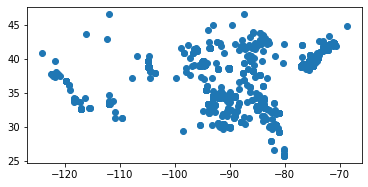

In [54]:
df_trimmed.plot()

# Check trimmed data for coordinates:

In [55]:
df_trimmed.geometry

0       POINT (-86.39971 35.19817)
1       POINT (-85.31081 35.04481)
2       POINT (-86.48221 31.30161)
3       POINT (-83.93629 35.96380)
4       POINT (-83.93586 35.95957)
                   ...            
1051    POINT (-74.90600 38.93510)
1052    POINT (-74.90600 38.93510)
1053    POINT (-74.90600 38.93510)
1054    POINT (-74.88674 39.00496)
1055    POINT (-74.92414 39.04871)
Name: geometry, Length: 1056, dtype: geometry

# Edit Plot

<AxesSubplot:>

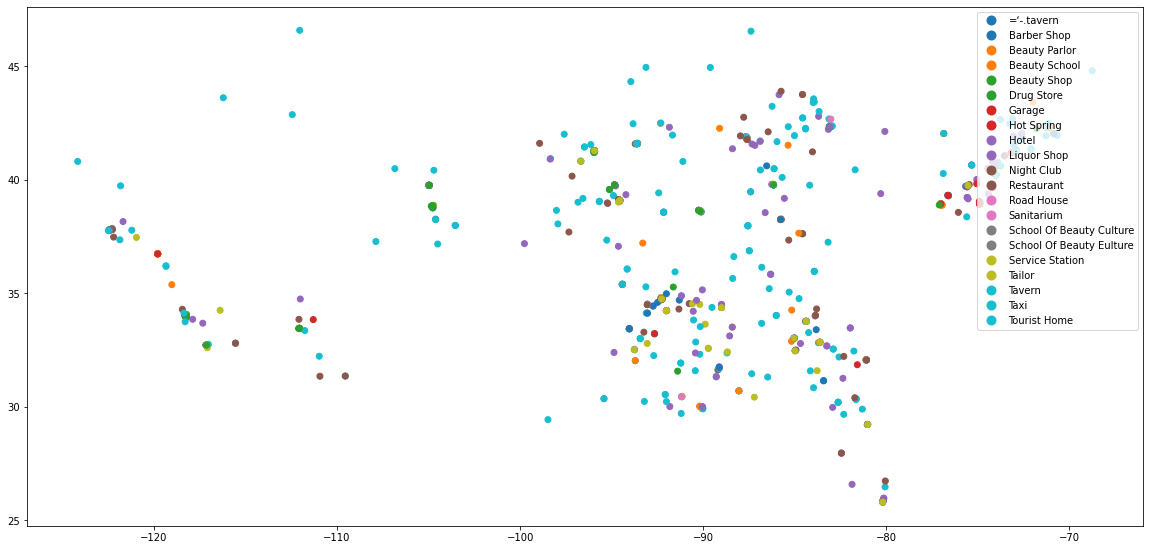

In [56]:
#Let's make this plot prettier!
df.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default); figsize = bpi unit
            column = 'category',   # column that defines the color of the dots; randomized
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side, top right
) 

# Import Folium in order to produce map

In [57]:
import folium

In [59]:
#let's make a map first of the US
m = folium.Map()
m

# Variable for LA Locations

In [61]:
#before we move to adding arguments to the folium map, let's make a variable for the locations only in LA
df_la = df_trimmed.query("city == 'LOS ANGELES'")
df_la

,name,city,state,category,geometry
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080)
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045)
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499)
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940)
...,...,...,...,...,...
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380)
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554)
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316)
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244)


In [62]:
import folium

In [63]:
m = folium.Map()
m

# Latitude and Longitude

In [66]:
#let's set up both the latitude and longitude variables to center on Los Angeles
latitude = 34.0522
latitude

34.0522

In [67]:
longitude = -118.2437
longitude

-118.2437

In [68]:
#now let's adjust the center of the map to LA
m = folium.Map(location=(latitude, longitude))
m

# Add Map Markers:

In [72]:
#yay! Now, let's add markers to our map. First, code the loop through the dataframe
for index, row in df_la.iterrows():
    print(row.name, row.geometry)

174 POINT (-118.250047 34.024989)
175 POINT (-118.240484 34.040797)
176 POINT (-118.241164 34.040451)
177 POINT (-118.250047 34.024989)
178 POINT (-118.243695 34.039404)
179 POINT (-118.24534 34.030036)
180 POINT (-118.243632 34.032965)
181 POINT (-118.242212 34.040679)
182 POINT (-118.2541 34.018665)
183 POINT (-118.244894 34.030786)
184 POINT (-118.235363 34.043514)
185 POINT (-118.256829 34.006848)
186 POINT (-118.241068 34.042461)
187 POINT (-118.242058 34.042074)
188 POINT (-118.271877 34.036944)
189 POINT (-118.240781 33.92952)
190 POINT (-118.256464 33.999821)
191 POINT (-118.265143 33.951536)
192 POINT (-118.256391 34.003937)
193 POINT (-118.256297 34.007382)
194 POINT (-118.2428 33.9406)
195 POINT (-118.265143 33.951536)
196 POINT (-118.274669 34.004018)
197 POINT (-118.308888 34.02425)
198 POINT (-118.256841 34.007213)
199 POINT (-118.253746 33.946438)
200 POINT (-118.262428 34.019806)
201 POINT (-118.240777 34.050497)
202 POINT (-118.265251 34.011072)
203 POINT (-118.284194 

In [75]:
#adding folium marker for each location
for index, row in df_la.iterrows():
        # add folium marker code
    folium.Marker([row.geometry], popup=row.name, tooltip=row.name).add_to(m)
m

ValueError: Expected two (lat, lon) values for location, instead got: [<shapely.geometry.point.Point object at 0x7f263d38e940>].

In [76]:
#My hypothesis is that this error is likely due to using geometry instead of latitude and longitude.

# Add color coloumn:

In [79]:
#let's add a new column to colorcode different types of locations...we have to add this column to the trimmed data set rather than the slice of LA (df_la)
df_trimmed['color'] = '' 

In [80]:
df_trimmed.head()

,name,city,state,category,geometry,color
0,"around 20,",WESTCHESTER,TENNESSEE,Tourist Home,POINT (-86.39971 35.19817),
1,St. Thomas,WESTCHESTER,TENNESSEE,Tourist Home,POINT (-85.31081 35.04481),
2,Mrs. Ed. Andrews,ANDALUSIA,TENNESSEE,Tourist Home,POINT (-86.48221 31.30161),
3,Dunbar,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93629 35.96380),
4,Palm Leaf,BIRMINGHAM,TENNESSEE,Tourist Home,POINT (-83.93586 35.95957),


In [77]:
#let's see what types of locations are in Los Angeles
df_la.category.unique()

array(['Hotel', 'Restaurant', 'Barber Shop', 'Tavern', 'Night Club',
       'Road House', 'Liquor Shop', 'Service Station', 'Garage',
       'Drug Store'], dtype=object)

In [83]:
#display rows that match a query...How many locations in LA were barber shops?
df_la.loc[df_trimmed['category'] == 'Barber Shop']

,name,city,state,category,geometry,color
223,Hotel,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.24994 34.02511),
224,Elite,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25609 34.00728),
225,Connie's,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25326 34.02148),
226,Bertha’ 3,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.29842 34.02551),
227,Personality,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25611 34.00682),
228,Williams,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.30916 34.02239),
229,Echo,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25646 33.98796),


# Change color of marker:

In [86]:
#Let's make all barber shops cadet blue...we must do this on the orginally trimemd data instead of the slice
df_trimmed.loc[df_trimmed['category'] == 'Barber Shop', 'color'] = 'cadetblue'

In [87]:
df_la.loc[df_trimmed['category'] == 'Barber Shop']

,name,city,state,category,geometry,color
223,Hotel,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.24994 34.02511),cadetblue
224,Elite,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25609 34.00728),cadetblue
225,Connie's,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25326 34.02148),cadetblue
226,Bertha’ 3,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.29842 34.02551),cadetblue
227,Personality,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25611 34.00682),cadetblue
228,Williams,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.30916 34.02239),cadetblue
229,Echo,LOS ANGELES,CALIFORNIA,Barber Shop,POINT (-118.25646 33.98796),cadetblue


In [107]:
#Let's add colors to the rest of the categories found in LA.
df_trimmed.loc[df_trimmed['category'] == 'Hotel', 'color'] = 'green'

In [108]:
df_la.loc[df_trimmed['category'] == 'Hotel']

,name,city,state,category,geometry,color
174,Clark,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499),green
175,Arcade,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24048 34.04080),green
176,Lincoln,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24116 34.04045),green
177,Sheridan,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25005 34.02499),green
178,McAlpin,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24370 34.03940),green
179,Elite,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24534 34.03004),green
180,Olympic,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24363 34.03296),green
181,Regal,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24221 34.04068),green
182,Sojourner’s,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25410 34.01866),green
183,Kentucky,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24489 34.03079),green


In [127]:
df_trimmed.loc[df_trimmed['category'] == 'Restaurant', 'color'] = 'darkred'

In [129]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Restaurant']

,name,city,state,category,geometry,color
189,Marble Inn,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.24078 33.92952),
190,Robertson's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25646 33.99982),
191,Chief,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.26514 33.95154),
192,Ivie's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25639 34.00394),
193,Pig N’ Pat,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25630 34.00738),
194,Henry Bros.,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.24280 33.94060),
195,Banks,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.26514 33.95154),
196,Nita's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.27467 34.00402),
197,John's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.30889 34.02425),
198,Eddie’s,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.25684 34.00721),


In [126]:
df_trimmed.loc[df_trimmed['category'] == 'Tavern', 'color'] = 'orange'

In [125]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Tavern']

,name,city,state,category,geometry,color
230,Marble Inn,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.24078 33.92952),
231,Margot,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.25645 33.99482),
232,Emeral Room,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.24100 34.03993),
233,Emerald Room,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.24100 34.03993),
234,Golden Gate,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.24256 33.94321),
235,Paradise,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.25644 33.99241),
236,Samba,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.23586 34.04190),
237,Onyx,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.24994 34.02511),
238,Crisbar,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.30893 34.02970),
239,Reney’s,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.25165 34.02324),


In [130]:
df_trimmed.loc[df_trimmed['category'] == 'Night Club', 'color'] = 'purple'

In [131]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Night Club']

,name,city,state,category,geometry,color
242,Club Alabam,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.25649 34.00729),
243,Down Beat,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.25684 34.00721),
244,Plantation,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.23592 34.03605),
245,Cafe Society,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.26196 34.02055),
246,Basket Room,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.25651 34.01449),
247,Harlem,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.24270 34.05370),
248,Rumboogie,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.24168 33.94319),
249,Harlem,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.24270 34.05370),
250,Billy Bergs,LOS ANGELES,CALIFORNIA,Night Club,POINT (-93.24451 33.27962),


In [132]:
df_trimmed.loc[df_trimmed['category'] == 'Road House', 'color'] = 'blue'

In [133]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Road House']

,name,city,state,category,geometry,color
251,Casa Blanca,LOS ANGELES,CALIFORNIA,Road House,POINT (-118.26243 34.01981),


In [134]:
df_trimmed.loc[df_trimmed['category'] == 'Liquor Shop', 'color'] = 'pink'

In [135]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Liquor Shop']

,name,city,state,category,geometry,color
252,House of Morgan,LOS ANGELES,CALIFORNIA,Liquor Shop,POINT (-118.25547 34.01745),
253,Mike’s,LOS ANGELES,CALIFORNIA,Liquor Shop,POINT (-118.24280 33.94060),
254,Dunbar,LOS ANGELES,CALIFORNIA,Liquor Shop,POINT (-118.25649 34.00714),


In [136]:
df_trimmed.loc[df_trimmed['category'] == 'Service Station', 'color'] = 'lightgray'

In [137]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Service Station']

,name,city,state,category,geometry,color
255,Newton's,LOS ANGELES,CALIFORNIA,Service Station,POINT (-120.95812 37.45696),
256,Hopkins Signal Ser.,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.25651 34.01269),
257,Long's,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.25526 34.01678),
258,Carner’ s,LOS ANGELES,CALIFORNIA,Service Station,POINT (-116.38657 34.24368),
259,Simpkins & Cower,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.25351 34.02161),
260,Si Johnson’s,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.30865 34.02420),
261,Tom's,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.29788 34.02531),
262,Hughes,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.23356 34.03830),
263,Brock,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.29297 34.02550),
264,Garcia,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.23592 34.03605),


In [138]:
df_trimmed.loc[df_trimmed['category'] == 'Garage', 'color'] = 'lightblue'

In [139]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Garage']

,name,city,state,category,geometry,color
265,Parkers,LOS ANGELES,CALIFORNIA,Garage,POINT (-118.23472 33.94289),
266,McAdam's,LOS ANGELES,CALIFORNIA,Garage,POINT (-118.29891 34.02511),
267,Bill’s,LOS ANGELES,CALIFORNIA,Garage,POINT (-118.26524 34.00906),


In [140]:
df_trimmed.loc[df_trimmed['category'] == 'Drug Store', 'color'] = 'darkgreen'

In [141]:
#hmmmm...unsure of why the color is not populating in the column...
df_la.loc[df_trimmed['category'] == 'Drug Store']

,name,city,state,category,geometry,color
268,Allums,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.25648 34.00439),
269,Medical,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.30858 34.02603),
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380),
271,Slopers,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.31764 34.02554),
272,Bader's,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24006 33.94316),
273,Duvet Bros.,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.24103 34.04244),
274,Beason,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.30893 34.02909),


In [142]:
#seems like the colors populated for the full dataset...
df_trimmed.sample(10)

,name,city,state,category,geometry,color
60,Brown Bomber,LITTLE ROCK,ARKANSAS,Restaurant,POINT (-92.28147 34.74146),darkred
90,De Lux Court,LITTLE ROCK,ARKANSAS,Tourist Home,POINT (-92.23640 34.75515),
998,Dave Brown,OMAHA,NEBRASKA,Tourist Home,POINT (-95.95069 41.27107),
1022,Mrs. A. Arch,ASBURY PARK,NEW JERSEY,Tourist Home,POINT (-74.02117 40.21403),
311,Mrs. G. Anderson,COLORADO SPRINGS V,COLORADO,Tourist Home,POINT (-104.97247 39.74865),
284,Douglass,SAN DIEGO,CALIFORNIA,Hotel,POINT (-117.16280 32.71147),green
1041,Aztex Room,I,NEW JERSEY,Tavern,POINT (-74.01942 40.21496),orange
813,Watts,WOBURN,MASSACHUSETTS,Tourist Home,POINT (-71.15052 42.47843),
148,Super,PHOENIX,ARIZONA,Service Station,POINT (-93.06326 32.78444),lightgray
369,Mrs. M. Barrett,BRIDGEPORT,CONNECTICUT,Tourist Home,POINT (-73.54072 41.05409),


In [143]:
#now lets see a sample of LA
df_la.sample(10)

,name,city,state,category,geometry,color
259,Simpkins & Cower,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.25351 34.02161),
185,Dunbar,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25683 34.00685),green
180,Olympic,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.24363 34.03296),green
218,Triangle,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.26952 33.95161),
182,Sojourner’s,LOS ANGELES,CALIFORNIA,Hotel,POINT (-118.25410 34.01866),green
257,Long's,LOS ANGELES,CALIFORNIA,Service Station,POINT (-118.25526 34.01678),
197,John's,LOS ANGELES,CALIFORNIA,Restaurant,POINT (-118.30889 34.02425),
231,Margot,LOS ANGELES,CALIFORNIA,Tavern,POINT (-118.25645 33.99482),
270,Martinas,LOS ANGELES,CALIFORNIA,Drug Store,POINT (-118.26523 34.00380),
249,Harlem,LOS ANGELES,CALIFORNIA,Night Club,POINT (-118.24270 34.05370),


In [144]:
# reset the map (you need to do this to erase previous layers)
m = folium.Map(location=[geometry], tiles='The Green Book, 1947', zoom_start=10)

NameError: name 'geometry' is not defined

In [145]:
#error is likely due to geometry used instead of longitude and latitude

In [148]:
# add the categories with color icons
for index, row in df_trimmed.iterrows():
    tooltip_text = row.category + ' Category' + row.name
    folium.Marker(
        [row.geometry], 
        popup=row.name, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)

# show the map
m

TypeError: can only concatenate str (not "int") to str

In [149]:
#error is likely due to geometry used instead of longitude and latitude

# Save map:

In [150]:
# save the interactive maps as an html file
m.save('df.html')